In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
import plotly.express as px

In [2]:
df= pd.read_csv('../data/Books_final(cleaned).csv')

In [3]:
df.head()

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,['Αυτοβοήθεια'],9789604617005,240.0,Χαρτόδετο
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,['Ισπανικά'],9788498484410,320.0,Μαλακό εξώφυλλο
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,['Φωτογραφία'],9789608152236,164.0,Χαρτόδετο
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,['Χόμπι'],9786185116224,80.0,Σκληρό εξώφυλλο
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"['Φιλοσοφία', 'Κοινωνιολογία', 'Θρησκεία']",9789604304264,208.0,Χαρτόδετο


In [4]:
df['Category'] = df['Category'].apply(lambda s : re.sub("'","",s))

df['Category'] = df['Category'].apply(lambda s : re.sub("[\[\]']","",s))

df['Category'] = df['Category'].str.split(',')

## Let's find the top category pairs and their quantities

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
dff =df.copy()

In [7]:
categories = list(set(list(dff['Category'].explode().values)))

In [8]:
def check_string(lst, word):
    if lst is np.nan:
        pass
    elif lst.count(word):
        return 1
    else:
        return 0

In [9]:
for cat in tqdm(categories):
    dff[cat] = list(map(lambda x: check_string(x, cat), dff['Category']))

dff.head()

  0%|          | 0/109 [00:00<?, ?it/s]

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding,Εφηβικά,Πληροφορική,Εκπαίδευση,Κόμιξ,Θρησκεία,Παιδικά,Σημειωματάρια,Μαθηματικά,ΓιαΜωρά,Βυζάντιο,Παιδαγωγική,ΕλληνικήΠοίηση,Δραστηριοτήτων,Βιογραφίες,ΑρχαίαΕλληνικήΓραμματεία,Ποίηση,Αρχιτεκτονική,Χόμπι,Δοκίμια,Τεχνικά,Κινηματογράφος,ΕλληνικήΓλώσσα,ΤαξιδιωτικήΛογοτεχνία,ΚλασικήΦιλολογία,Αγγλικά,ΑνατολικήΣκέψη,Λύκειο,Γερμανικά,Ψυχανάλυση,Φυσικές&ΘετικέςΕπιστήμες,ΣχολικάΒοηθήματα,Ζωγραφική,Χορός,ΚλασικήΠεζογραφία,Νουβέλα,Κρασί,ΚοινωνικάΠροβλήματα,Οικονομικά,Αθλητισμός,Εθνολογία,Φιλοσοφία,ΕλεύθεροςΧρόνος,Αυτοβιογραφίες,Νεότερη&ΣύγχρονηΕλληνικήΙστορία,Ποτό,ΙσότηταΦύλων,Γλωσσολογία,Οικονομία,Γάμος,Ισπανικά,Ψυχολογία,Ψυχιατρική,Οδηγοί,Πολιτική,Φυσική,Ταξίδια,Διατροφή,ΕυρωπαϊκήΦιλοσοφία,ΜεταφρασμένηΠοίηση,Μύθοι,Κοινωνιολογία,Ιστορία,Νομική,Ανθρωπολογία,ΛατινικήΓραμματεία,Μουσική,ΕργασιακέςΣχέσεις,Κινηματογράφος,Γυμνάσιο,Γαλλικά,ΕφηβικήΛογοτεχνία,ΤαξιδιωτικοίΟδηγοί,Μυθιστόρημα,ΕκλαϊκευμένηΕπιστήμη,Αθλητισμός,Αποκρυφισμός,Πεζογραφία,ΒυζαντινήΓραμματεία,ΞένεςΓλώσσες,Θέατρο,GraphicNovels,Χάρτες,Σχέσεις,Μεταφυσική,Λεξικά&Εγκυκλοπαίδειες,Τέχνες,Μαρτυρίες,Προϊστορία,Ξενόγλωσσα,Χριστιανισμός,Οικογένεια,ΑρχαίοιΈλληνεςΦιλόσοφοι,ΕναλλακτικέςΘεραπείες,ΓενικάΛεξικά,ΠροσχολικήΗλικία,ΠαγκόσμιαΙστορία,Μαγειρική,Ιατρική,Διήγημα,Δημοτικό,Θέατρο,Παραμύθια,Διαδραστικά,Φωτογραφία,ΕλληνικήΕπανάσταση,Αυτοβοήθεια,Μυθολογία,Ημερολόγια,Συνταγές
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,[Αυτοβοήθεια],9789604617005,240.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,[Ισπανικά],9788498484410,320.0,Μαλακό εξώφυλλο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,[Φωτογραφία],9789608152236,164.0,Χαρτόδετο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,[Χόμπι],9786185116224,80.0,Σκληρό εξώφυλλο,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"[Φιλοσοφία, Κοινωνιολογία, Θρησκεία]",9789604304264,208.0,Χαρτόδετο,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
def convert_nums(x, cat):
    if x is np.nan:
        return np.nan
    elif x == 1:
        return cat
    else:
        return np.nan

In [11]:
for cat in tqdm(categories):
    dff[cat] = list(map(lambda x: convert_nums(x, cat), dff[cat]))

  0%|          | 0/109 [00:00<?, ?it/s]

In [12]:
df_new = dff[list(dff.columns[11:])].reset_index().copy()
df_new = df_new.drop('index', 1)
df_new = df_new.fillna("")
df_new.head()

,Εφηβικά,Πληροφορική,Εκπαίδευση,Κόμιξ,Θρησκεία,Παιδικά,Σημειωματάρια,Μαθηματικά,ΓιαΜωρά,Βυζάντιο,Παιδαγωγική,ΕλληνικήΠοίηση,Δραστηριοτήτων,Βιογραφίες,ΑρχαίαΕλληνικήΓραμματεία,Ποίηση,Αρχιτεκτονική,Χόμπι,Δοκίμια,Τεχνικά,Κινηματογράφος,ΕλληνικήΓλώσσα,ΤαξιδιωτικήΛογοτεχνία,ΚλασικήΦιλολογία,Αγγλικά,ΑνατολικήΣκέψη,Λύκειο,Γερμανικά,Ψυχανάλυση,Φυσικές&ΘετικέςΕπιστήμες,ΣχολικάΒοηθήματα,Ζωγραφική,Χορός,ΚλασικήΠεζογραφία,Νουβέλα,Κρασί,ΚοινωνικάΠροβλήματα,Οικονομικά,Αθλητισμός,Εθνολογία,Φιλοσοφία,ΕλεύθεροςΧρόνος,Αυτοβιογραφίες,Νεότερη&ΣύγχρονηΕλληνικήΙστορία,Ποτό,ΙσότηταΦύλων,Γλωσσολογία,Οικονομία,Γάμος,Ισπανικά,Ψυχολογία,Ψυχιατρική,Οδηγοί,Πολιτική,Φυσική,Ταξίδια,Διατροφή,ΕυρωπαϊκήΦιλοσοφία,ΜεταφρασμένηΠοίηση,Μύθοι,Κοινωνιολογία,Ιστορία,Νομική,Ανθρωπολογία,ΛατινικήΓραμματεία,Μουσική,ΕργασιακέςΣχέσεις,Κινηματογράφος,Γυμνάσιο,Γαλλικά,ΕφηβικήΛογοτεχνία,ΤαξιδιωτικοίΟδηγοί,Μυθιστόρημα,ΕκλαϊκευμένηΕπιστήμη,Αθλητισμός,Αποκρυφισμός,Πεζογραφία,ΒυζαντινήΓραμματεία,ΞένεςΓλώσσες,Θέατρο,GraphicNovels,Χάρτες,Σχέσεις,Μεταφυσική,Λεξικά&Εγκυκλοπαίδειες,Τέχνες,Μαρτυρίες,Προϊστορία,Ξενόγλωσσα,Χριστιανισμός,Οικογένεια,ΑρχαίοιΈλληνεςΦιλόσοφοι,ΕναλλακτικέςΘεραπείες,ΓενικάΛεξικά,ΠροσχολικήΗλικία,ΠαγκόσμιαΙστορία,Μαγειρική,Ιατρική,Διήγημα,Δημοτικό,Θέατρο,Παραμύθια,Διαδραστικά,Φωτογραφία,ΕλληνικήΕπανάσταση,Αυτοβοήθεια,Μυθολογία,Ημερολόγια,Συνταγές
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Αυτοβοήθεια,,,
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Ισπανικά,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Φωτογραφία,,,,,
3,,,,,,,,,,,,,,,,,,Χόμπι,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,,,,Θρησκεία,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Φιλοσοφία,,,,,,,,,,,,,,,,,,,,Κοινωνιολογία,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [13]:
from collections import Counter
from itertools import combinations

In [14]:
n = 200
K = Counter([l for i in df_new.values for l in combinations([p for p in i if p != ''], 2)]).most_common()

df1 = pd.DataFrame(K, columns=['Pair', 'Qty'])
df1.head(20)

,Pair,Qty
0,"( Θρησκεία, Φιλοσοφία)",2076
1,"( Θρησκεία, Κοινωνιολογία)",2076
2,"(Φιλοσοφία, Κοινωνιολογία)",2076
3,"(Εκπαίδευση, Παιδαγωγική)",1600
4,"( Οικονομία, Πολιτική)",1294
5,"( Εφηβικά, Παιδικά)",1245
6,"( Ψυχανάλυση, Ψυχολογία)",699
7,"( Τεχνικά, Φυσικές&ΘετικέςΕπιστήμες)",535
8,"( Μαθηματικά, Φυσική)",405
9,"( Κινηματογράφος, Θέατρο)",227


## _Plotting the results_

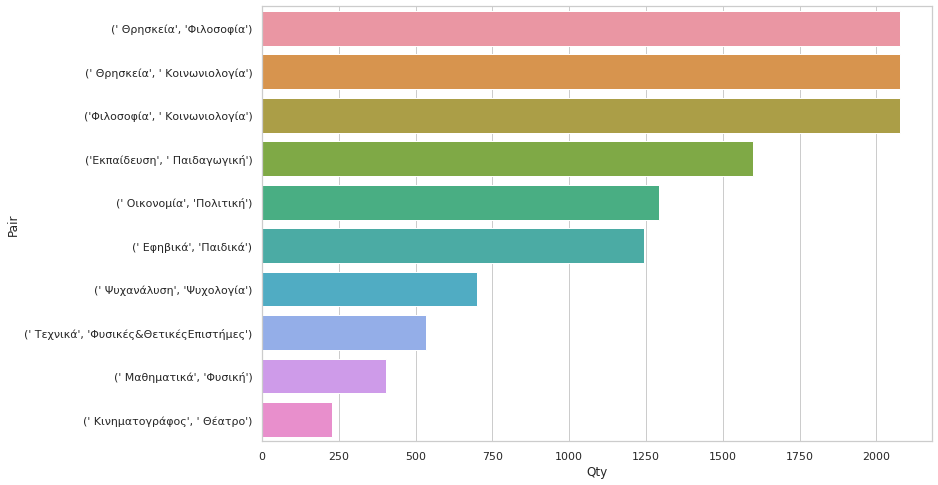

In [15]:
plt.figure(figsize=[12,8])
sns.set(style='whitegrid', palette='flare')
sns.barplot(data= df1.head(10), x='Qty', y='Pair')
plt.show()

In [16]:
df2 = df1.copy()
df2['Pair'] = df2['Pair'].str.join(' ')

In [17]:
df2.to_csv('for_dash.csv',index=False)

In [18]:
df.head()

,Title,Price_Old,Discount,Price_New,Author,Link,Year,Category,ISBN,Pages,Binding
0,Οι 5 γλώσσες της αγάπης - 2η έκδοση,15.50,0.26,11.47,Gary Chapman,https://www.captainbook.gr/book/oi-5-glosses-t...,2016,[Αυτοβοήθεια],9789604617005,240.0,Χαρτόδετο
1,Universo Gramatical Version…,27.75,0.11,24.70,María Jesús Blázquez Lozano,https://www.captainbook.gr/book/universo-grama...,2016,[Ισπανικά],9788498484410,320.0,Μαλακό εξώφυλλο
2,MIRRORLESS PHOTOGRAPHY,15.00,0.10,13.50,Βαγγέλης Δελέγκος,https://www.captainbook.gr/book/mirrorless-pho...,2016,[Φωτογραφία],9789608152236,164.0,Χαρτόδετο
3,Τριγυρνώ μες στην Αθήνα,12.00,0.11,10.68,Πέτρος Χριστούλιας,https://www.captainbook.gr/book/trigurno-mes-s...,2016,[Χόμπι],9786185116224,80.0,Σκληρό εξώφυλλο
4,Θαυματουργά Μάντρας,22.00,0.10,19.80,Pandit Gopal Sharma,https://www.captainbook.gr/book/thaumatourga-m...,2016,"[Φιλοσοφία, Κοινωνιολογία, Θρησκεία]",9789604304264,208.0,Χαρτόδετο


---
## _Now let's find which authors have the most registered books on the site_

In [19]:
fp = pd.DataFrame(df.Author.value_counts())

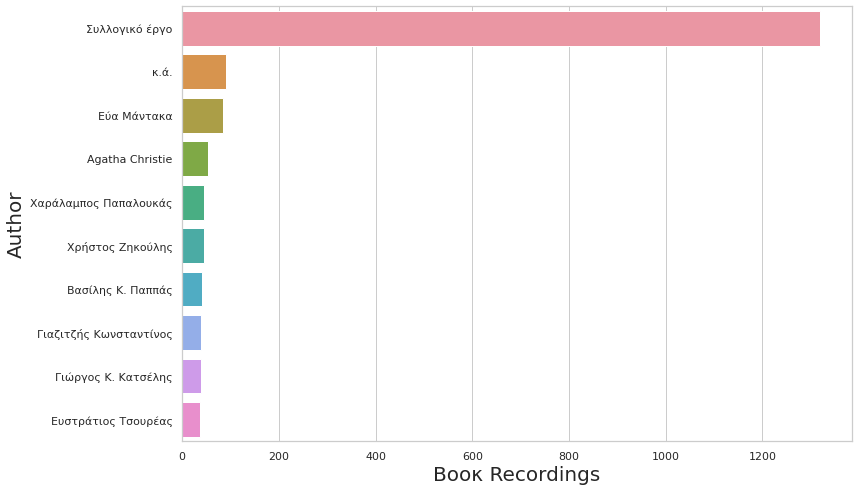

In [20]:
plt.figure(figsize=[12,8])
sns.barplot(data= fp.head(10), x = 'Author', y=fp.head(10).index)
plt.xlabel('Βοοκ Recordings', fontsize=20)
plt.ylabel('Author',fontsize=20)
plt.show()

---
### _Proceed to distribution and outliers checking of the numerical columns_

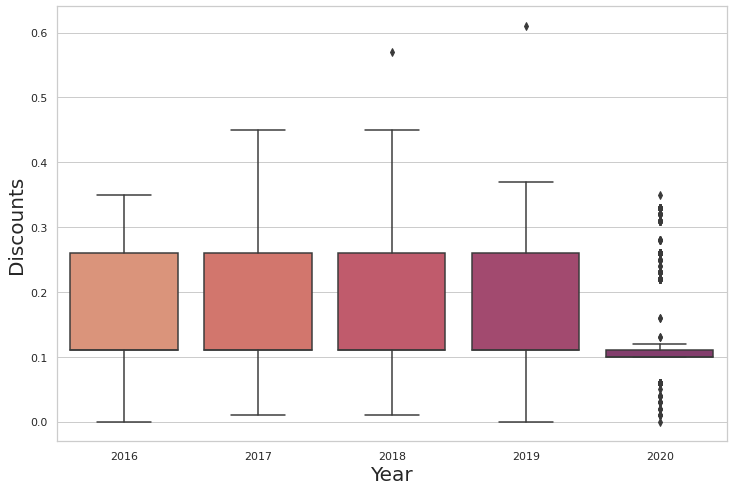

In [21]:
plt.figure(figsize=[12,8])
sns.boxplot(data=df, x= 'Year', y= 'Discount')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Discounts', fontsize=20)
plt.show()

In [22]:
df3= df[(df['Year']==2016)]

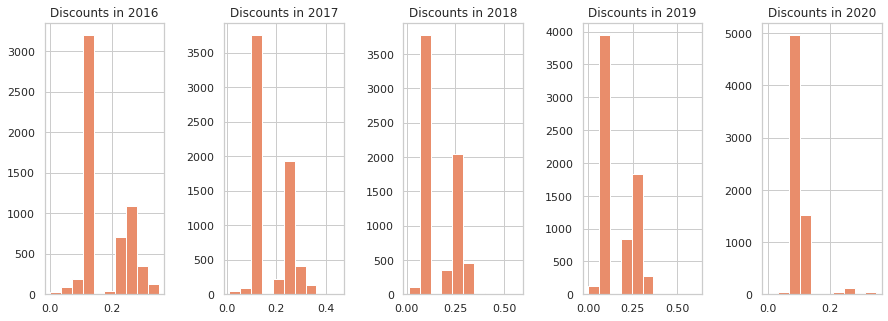

In [25]:
years=[2016,2017,2018,2019,2020]

c=1
plt.figure(figsize=(15, 5))

for year in years:
        df3=df[(df['Year'] == year)]
        plt.subplot(1,5,c)
        plt.subplots_adjust(wspace=.5, hspace=.5)
        name = "Discounts in " + str(year)
        plt.title(name)
        plt.hist(df3['Discount'])
        c += 1

plt.show()

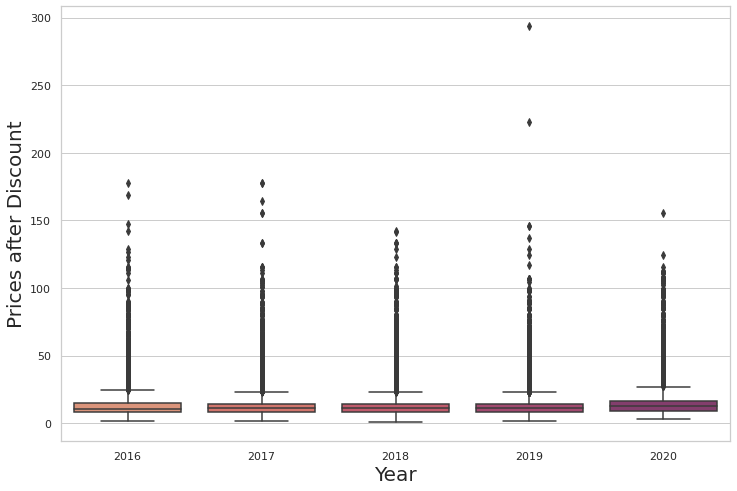

In [30]:
plt.figure(figsize=[12,8])
sns.boxplot(data=df, x= 'Year', y= 'Price_New')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Prices after Discount', fontsize=20)
plt.show()

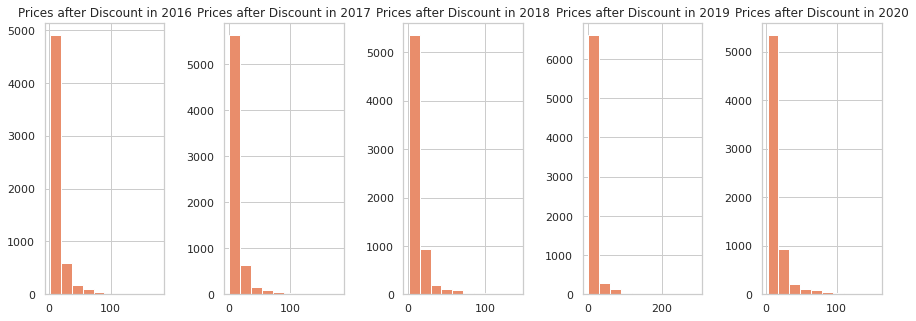

In [27]:
c=1
plt.figure(figsize=(15, 5))

for year in years:
        df3=df[(df['Year'] == year)]
        plt.subplot(1,5,c)
        plt.subplots_adjust(wspace=.5, hspace=.5)
        name = "Prices after Discount in " + str(year)
        plt.title(name)
        plt.hist(df3['Price_New'])
        c += 1

plt.show()